In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
mask_features = pd.read_csv("/Users/onur_serce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup", sep=";", on_bad_lines='warn')

/var/folders/9p/yj4h2ydd47g1c0r59wypbbd16vt4k0/T/ipykernel_24372/3781470467.py:1: ParserWarning: Skipping line 47805: expected 231 fields, saw 366

  mask_features = pd.read_csv("/Users/onur_serce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup", sep=";", on_bad_lines='warn')
/var/folders/9p/yj4h2ydd47g1c0r59wypbbd16vt4k0/T/ipykernel_24372/3781470467.py:1: ParserWarning: Skipping line 194397: expected 231 fields, saw 302

  mask_features = pd.read_csv("/Users/onur_serce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup", sep=";", on_bad_lines='warn')
/var/folders/9p/yj4h2ydd47g1c0r59wypbbd16vt4k0/T/ipykernel_24372/3781470467.py:1: ParserWarning: Skipping line 219080: expected 231 fields, saw 344

  mask_features = pd.read_csv("/Users/onur_serce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup", sep=";", on_bad_lines='warn')
/var/folders/9p/yj4h2ydd47g1c0r59wypbbd16vt4k0/T/ipykernel_24372/3781470467.py:1: ParserWarning: Skipping line 382828: expected 231 fields, saw 283

  mask

In [3]:
mask_features.head()

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-MIN SYTOG.1,CELL WINDOWED-INTENSITY-STDDEV AF555.1,CELL WINDOWED-INTENSITY-STDDEV AF647.1,CELL WINDOWED-INTENSITY-STDDEV SYTOG.1,REGION COMBINED Region 1.1,REGION COMBINED Region 4.1,REGION COMBINED Region 5.1,REGION COMBINED Region 2.1,REGION COMBINED Region 3.1,Unnamed: 230
0,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.072043,0.013090,-0.002525,0.193304,0.0,0.0,1.0,0.0,0.0,NaN
1,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.213577,0.004489,-0.018174,0.018469,0.0,0.0,1.0,0.0,0.0,NaN
2,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.118465,0.008339,0.002494,0.067541,0.0,0.0,1.0,0.0,0.0,NaN
3,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.129054,0.019876,0.012955,0.173649,0.0,0.0,1.0,0.0,0.0,NaN
4,1,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m20_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.114021,0.017269,0.008782,0.266945,0.0,0.0,1.0,0.0,0.0,NaN


In [56]:
len(mask_features.columns)
len(mask_features)

388597

In [21]:
# Drop duplicate columns
dup_cols = []

for col in mask_features.columns:
    if col.endswith(".1"):
        dup_cols.append(col)

# Drop it like it's hot!
mask_features.drop(dup_cols, axis=1, inplace=True)

In [23]:
mask_features.columns

Index(['il id', 'series', 'path', 'name', 'type', 'plate', 'well', 'well_row',
       'well_column', 'timepoint',
       ...
       'CELL WINDOWED-INTENSITY-STDDEV AF647',
       'CELL WINDOWED-INTENSITY-STDDEV SYTOG', 'REGION COMBINED Region 1',
       'REGION COMBINED Region 4', 'REGION COMBINED Region 5',
       'REGION COMBINED Region 2', 'REGION COMBINED Region 3', 'rowid',
       'il id.2', 'Unnamed: 230'],
      dtype='object', length=124)

In [25]:
mask_features.to_csv('/Users/onur_serce/MPIB/20240125_MPIB_15um/test.csv', sep=";", index=False)

In [86]:
# Save data from each region into seperate csv files
 
for col in mask_features.columns:
    if col.startswith("REGION COMBINED"):
        region = "_".join(col.split(" ")[-2:])
        subdf = mask_features.loc[mask_features.loc[:, col] == 1, :]
        subdf.to_csv("/Users/onur_serce/MPIB/20240125_MPIB_15um/mask_features_regions_dedup" + "_" + region + ".csv", sep=",")

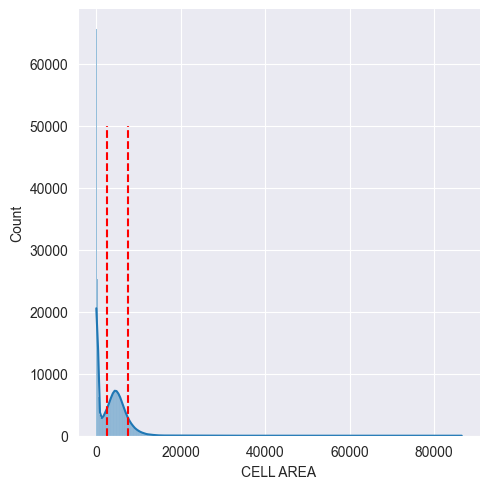

In [54]:
sb.displot(data=mask_features, x="CELL AREA", kde=True)
plt.vlines(ymin=0, ymax=50000, x=2500, linestyles='dashed', color='r')
plt.vlines(ymin=0, ymax=50000, x=7500, linestyles='dashed', color='r')

In [55]:
mask_features.describe()

,il id,plate,well_row,well_column,timepoint,mosaic,channel,plane,lambda,optional,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
count,388597.000000,388597.0,388597.0,388597.0,388597.0,388597.000000,388597.0,388597.0,388597.0,388597.0,...,388597.000000,388597.000000,3.885970e+05,388597.000000,388597.000000,3.885970e+05,388597.000000,388597.000000,388597.000000,0.0
mean,297.003873,1.0,1.0,1.0,1.0,341.877928,0.0,1.0,1.0,0.0,...,0.146276,0.194282,4.284180e+07,0.014082,0.038412,3.565580e+05,0.051014,194302.031194,297.002913,NaN
std,174.794862,0.0,0.0,0.0,0.0,192.245724,0.0,0.0,0.0,0.0,...,10.706666,71.197757,2.670653e+10,95.525850,89.368189,2.222694e+08,110.146543,112180.984203,174.795469,NaN
min,1.000000,1.0,1.0,1.0,1.0,1.000000,0.0,1.0,1.0,0.0,...,-0.031427,0.001843,0.000000e+00,-59547.851562,-55709.238281,0.000000e+00,-68661.929688,-1.119939,-0.000118,NaN
25%,142.000000,1.0,1.0,1.0,1.0,174.000000,0.0,1.0,1.0,0.0,...,0.006065,0.032783,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,97151.000000,142.000000,NaN
50%,295.000000,1.0,1.0,1.0,1.0,349.000000,0.0,1.0,1.0,0.0,...,0.073632,0.068439,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,194300.000000,295.000000,NaN
75%,451.000000,1.0,1.0,1.0,1.0,503.000000,0.0,1.0,1.0,0.0,...,0.188994,0.111040,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,291454.000000,451.000000,NaN
max,604.000000,1.0,1.0,1.0,1.0,671.000000,0.0,1.0,1.0,0.0,...,6673.541016,44383.000000,1.664819e+13,1.000000,1.000000,1.385573e+11,1.000000,388605.000000,604.000000,NaN


In [62]:
(mask_features['name'] == 'p1_wA1_t1_m20_c0_z1_l1_o0').sum()

528

In [63]:
(mask_features['name'] == 'p1_wA1_t1_m21_c0_z1_l1_o0').sum()

82